In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,PowerTransformer
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score,RocCurveDisplay,roc_curve,precision_recall_curve,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier

import scipy
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# For model building
import sklearn 
import xgboost
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier

# For metrics evaluation

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV



# Misc.
import warnings
warnings.filterwarnings('ignore')

In [13]:
def create_count_plot(data, x_col, hue_col, title):
    # Define the neon_palette
    neon_palette = ["#faeb2c", "#f52789", "#e900ff", "#1685f8", "#3d144c"]

    # Create the count plot
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=neon_palette)
    ax.set_facecolor('#F6F5F4')
    ax.set_title(title, fontsize=16, pad=20)
    ax.set_xlabel(x_col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    
    ax.grid(True, linestyle='--', alpha=0.5)
    sns.despine(right=True)
    sns.despine(offset=5, trim=True)

    # Adding percentage annotations
    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f}%'.format((height / total) * 100),
                ha="center", fontsize=10, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()


In [2]:
df = pd.read_csv('Insurance_Data.csv')

In [3]:
df_raw = df.copy

In [4]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.050000,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.020000,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.020000,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.110000,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.800000,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.110000,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.000000,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
# Fixing data type and cleaning data

In [8]:
df['airbags']=df['airbags'].astype('object')
df['cylinder']=df['cylinder'].astype('object')
df['gear_box']=df['gear_box'].astype('object')
df['ncap_rating']=df['ncap_rating'].astype('object')
df['is_claim']=df['is_claim'].astype('object')

__Univariate Analysis__

In [7]:
cat=df.select_dtypes(include=object).columns

In [6]:
# row = 14
# col=3
# iterator=1
# for i in  cat:
#     plt.subplots_adjust(left=None, bottom=1, right=1.2, top=10, wspace=None, hspace=1.3)
#     plt.subplot(row,col,iterator)
#     df[i].value_counts().plot(kind='bar')
#     #sns.countplot(df.loc[:,i])
#     plt.title(i)
#     iterator+=1
#     plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [7]:
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

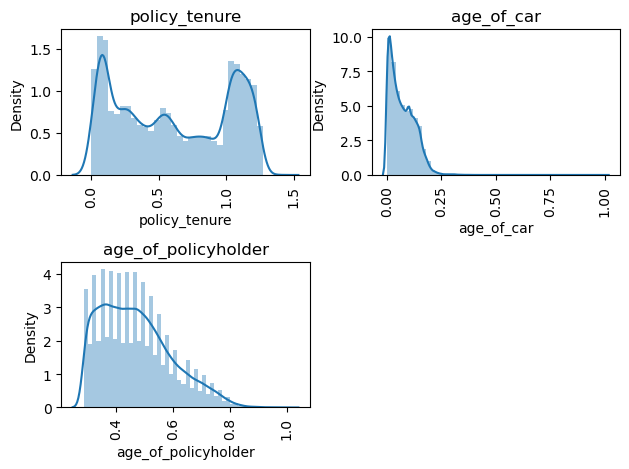

In [8]:
n=['policy_tenure', 'age_of_car', 'age_of_policyholder']
rows=2
columns=2
iterator=1

for i in n:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df[i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

In [9]:
df.duplicated().sum()

0

In [10]:
df=df.drop('policy_id', axis=1)

In [11]:
df.dtypes.value_counts()

object     27
int64      12
float64     4
dtype: int64

In [12]:
df.isna().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [13]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.335370,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.622270,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


__Univariate analysis__

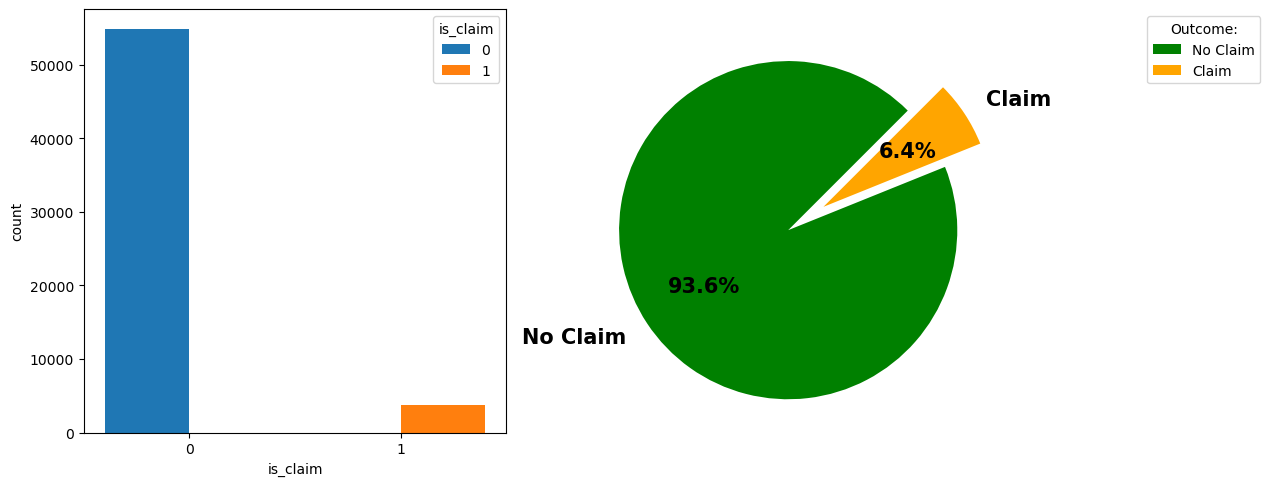

In [14]:
# Exploring target class

fig = plt.figure(figsize=(12,5.5))
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(x=df['is_claim'],data=df,saturation=1,hue='is_claim')



ax2 = fig.add_subplot(1, 2, 2)        

plt.pie(df['is_claim'].value_counts(),labels=['No Claim','Claim'],radius=1,colors = ['green','orange'],
        autopct='%1.1f%%',explode = [0.1,0.15],labeldistance=1.15,startangle = 45, 
        textprops={'fontsize': 15,'fontweight':'bold'})

plt.legend(title = 'Outcome:',loc='upper right', bbox_to_anchor=(1.6,1))
plt.show()

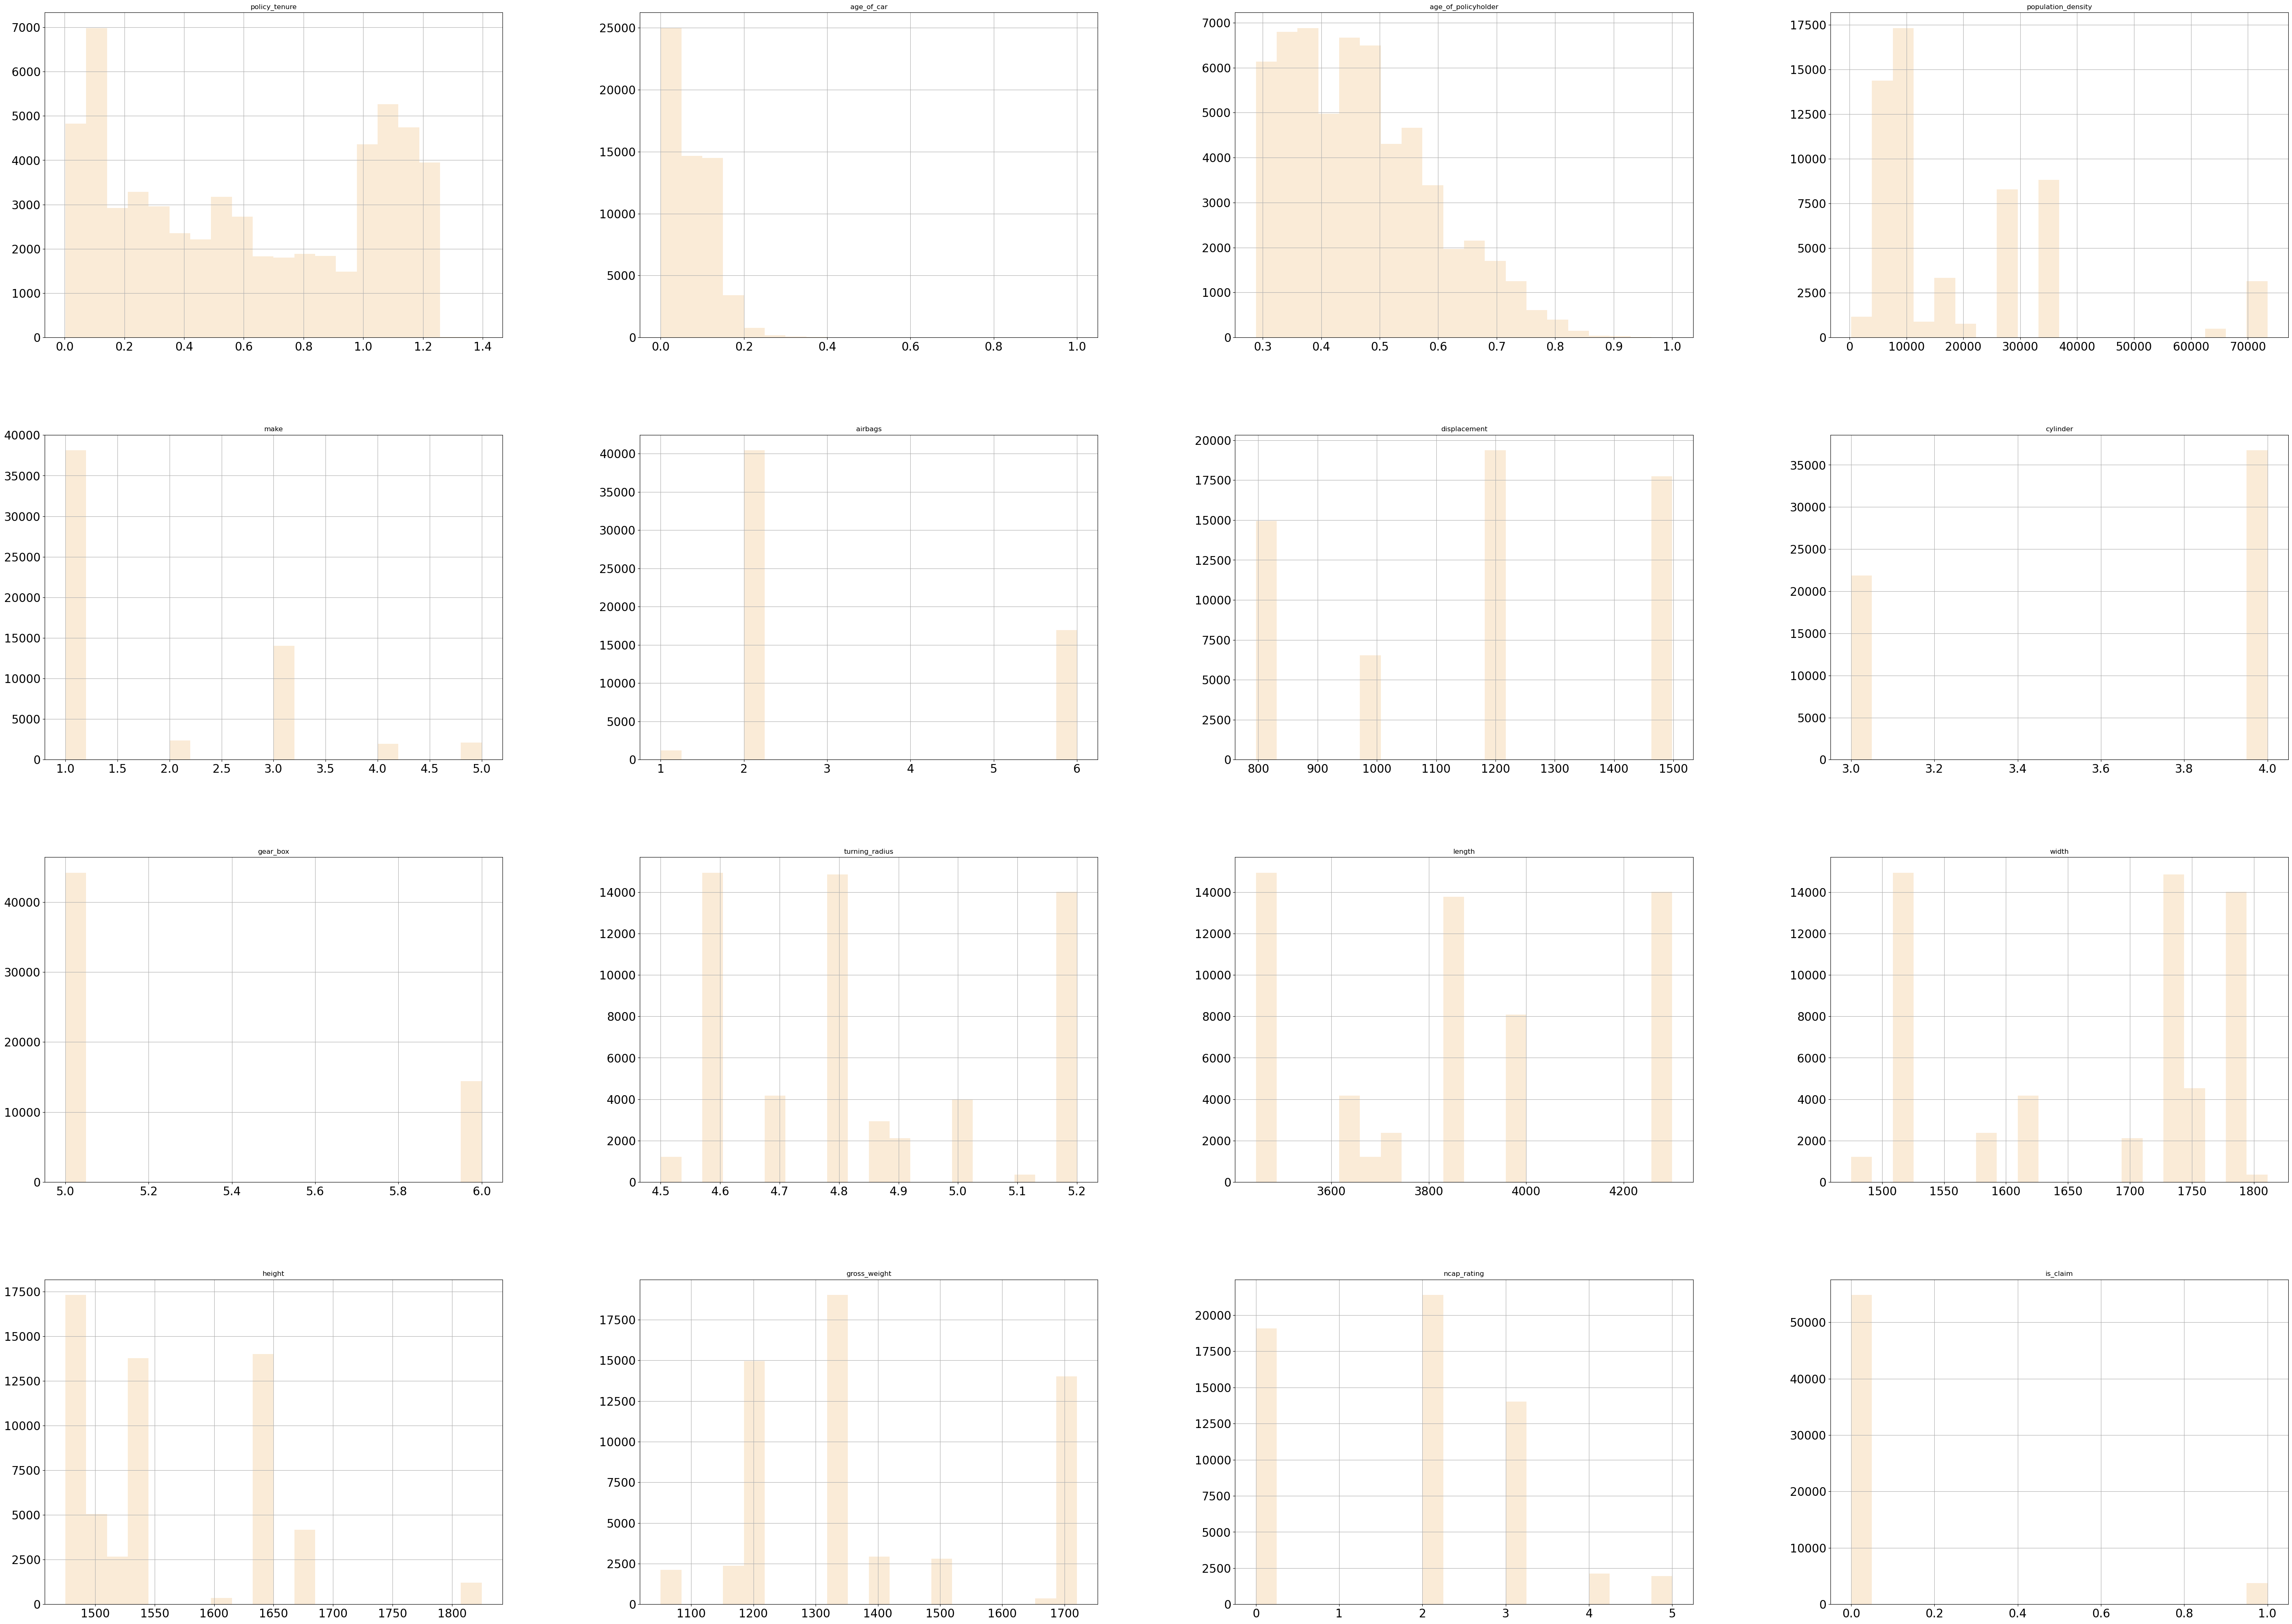

In [15]:
df.hist(xlabelsize=20,ylabelsize=20,bins=20,figsize=(70,50),color='#FAEBD7')
plt.subplot
plt.show()

__Insights__
- Highest no. of claims(about 1000) come from area C8.

- Owners with models M1 M4 and M6 have highest claims (about 1000 each).

- There are zero claims where speed alert system isn't present in 

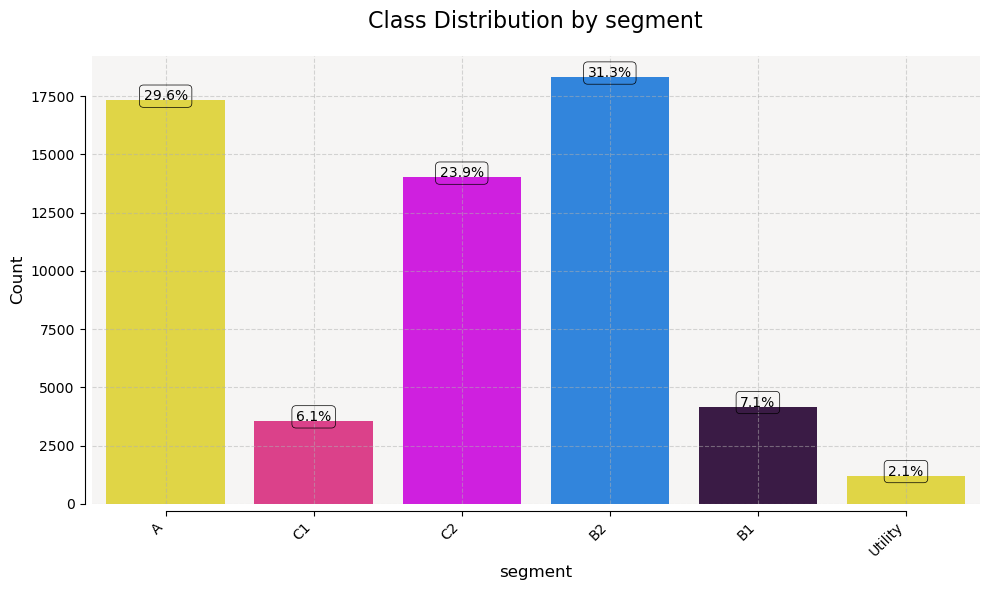

In [40]:
#Count plot for segment
create_count_plot(df, x_col='segment', hue_col=None, title='Class Distribution by segment')

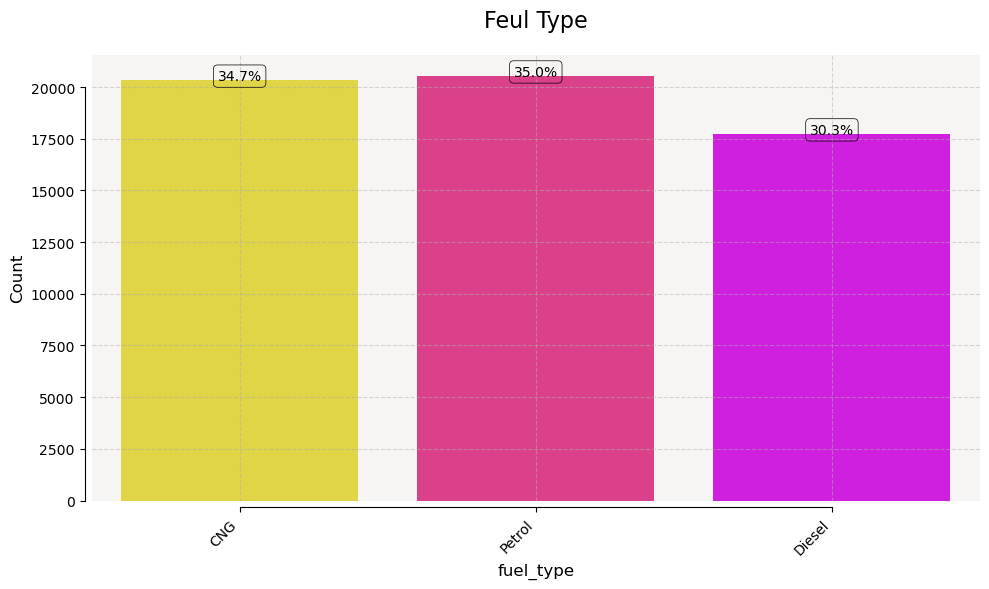

In [32]:
#Count plot for fuel_type
create_count_plot(df, x_col='fuel_type', hue_col=None, title='Feul Type')

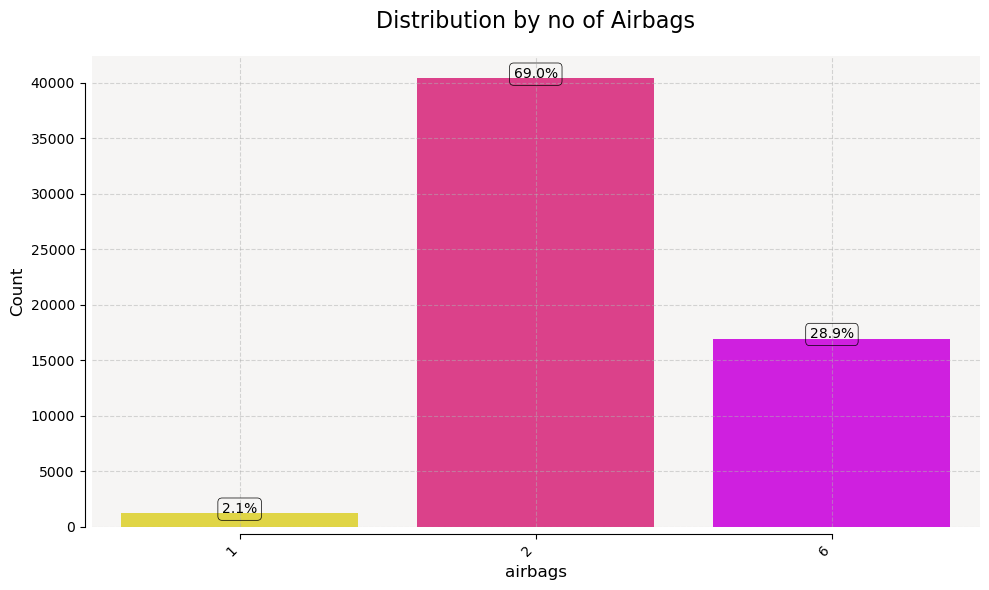

In [33]:
#Count plot for airbags
create_count_plot(df, x_col='airbags', hue_col=None, title='Distribution by no of airbags')

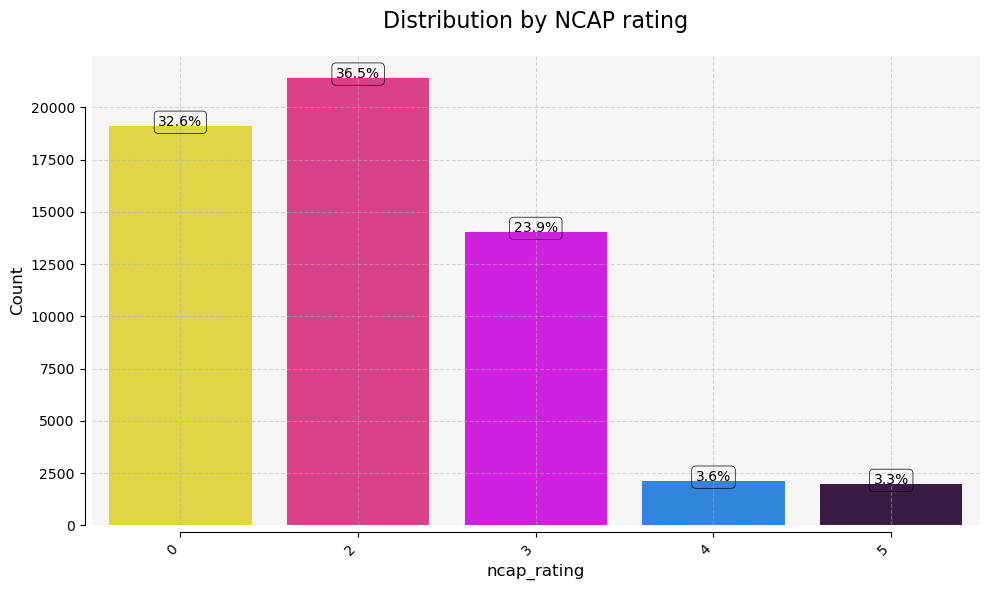

In [35]:
#Count plot for fuel_type
create_count_plot(df, x_col='ncap_rating', hue_col=None, title='Distribution by NCAP rating')

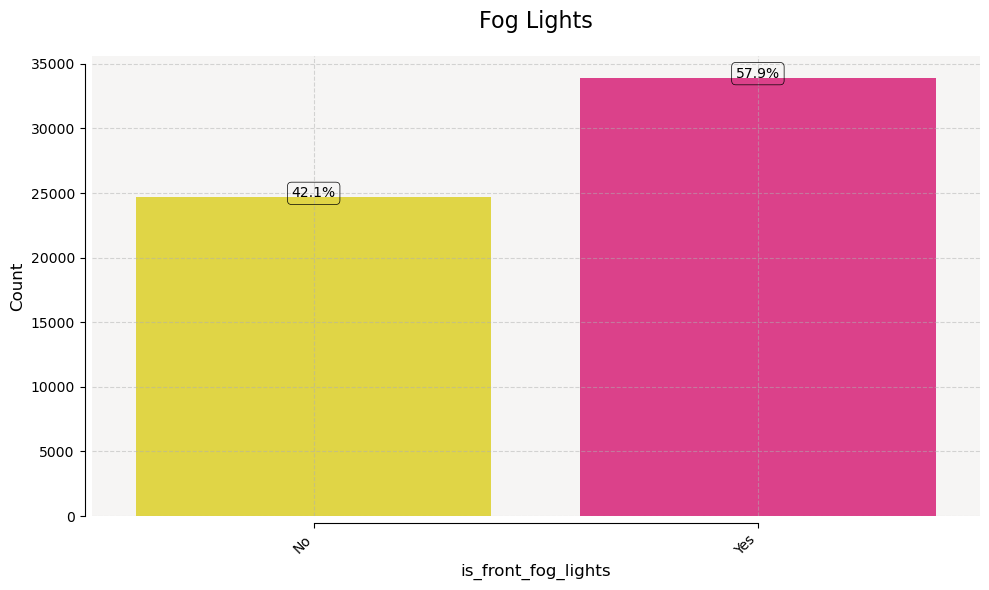

In [36]:
#Count plot for fog lights
create_count_plot(df, x_col='is_front_fog_lights', hue_col=None, title='Fog Lights')

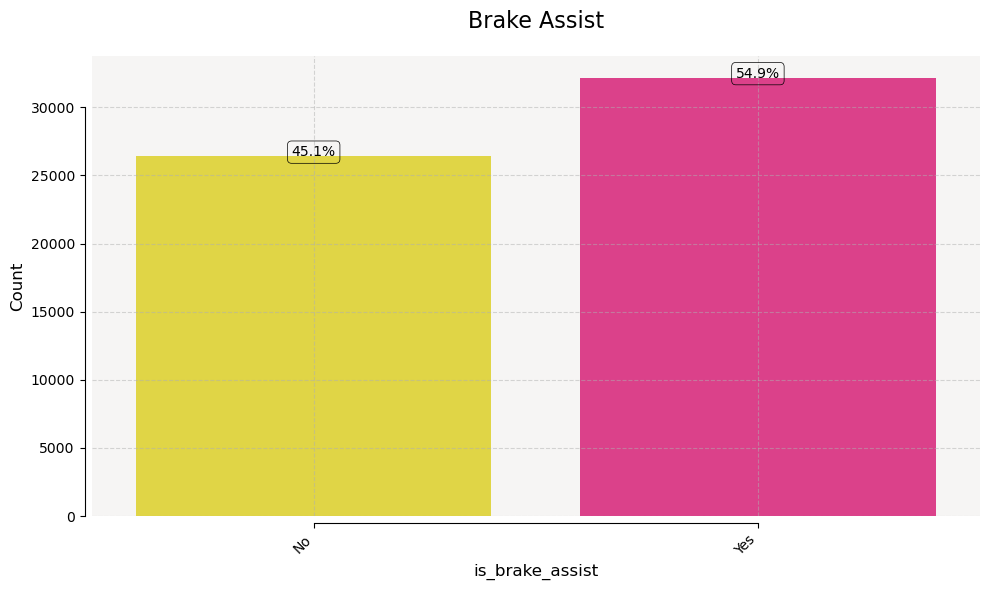

In [37]:
#Count plot for fuel_type
create_count_plot(df, x_col='is_brake_assist', hue_col=None, title='Brake Assist')

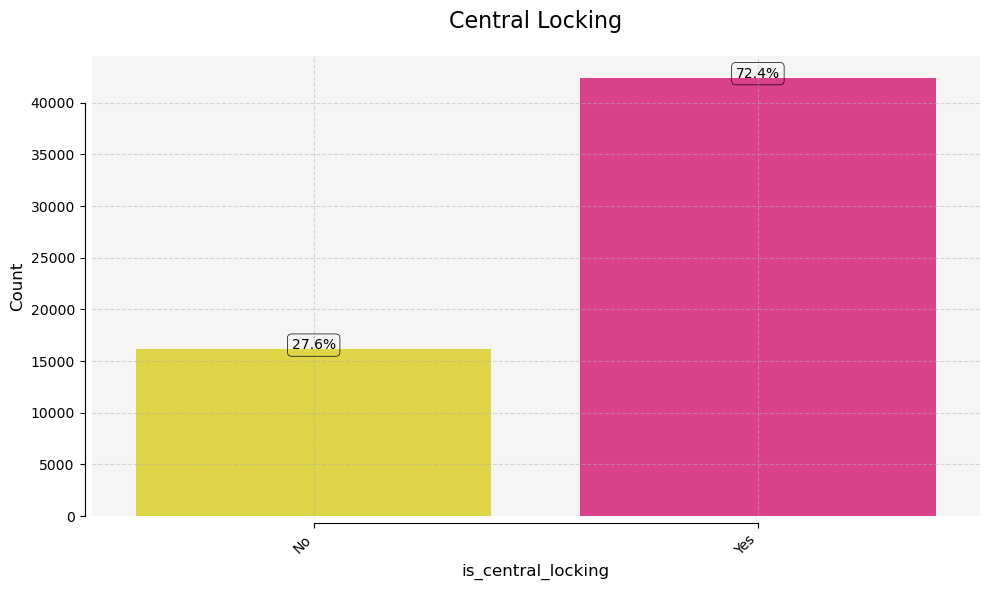

In [38]:
#Count plot for fuel_type
create_count_plot(df, x_col='is_central_locking', hue_col=None, title='Central Locking')

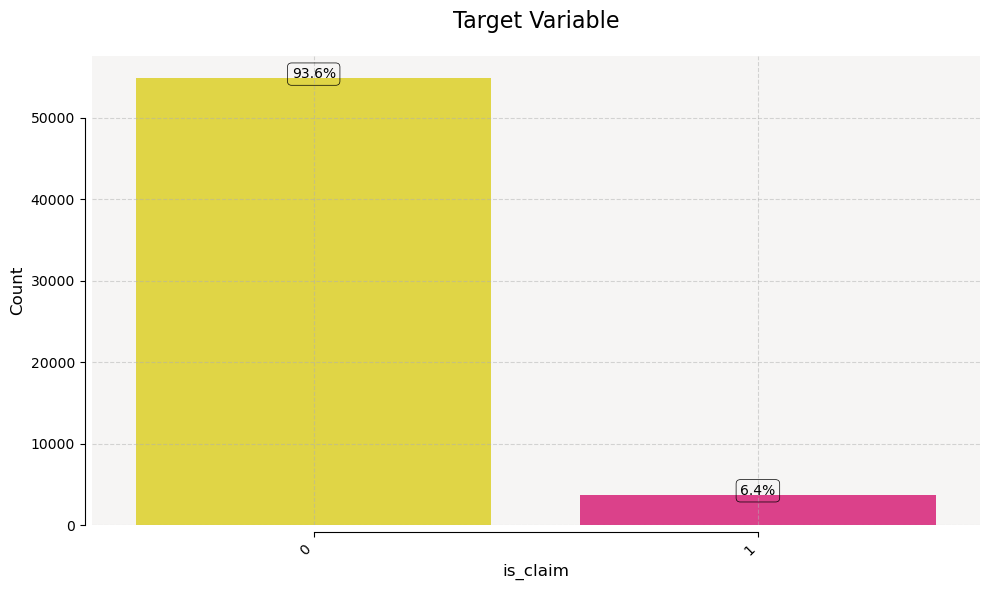

In [42]:
#Count plot for fuel_type
create_count_plot(df, x_col='is_claim', hue_col=None, title='Target Variable')

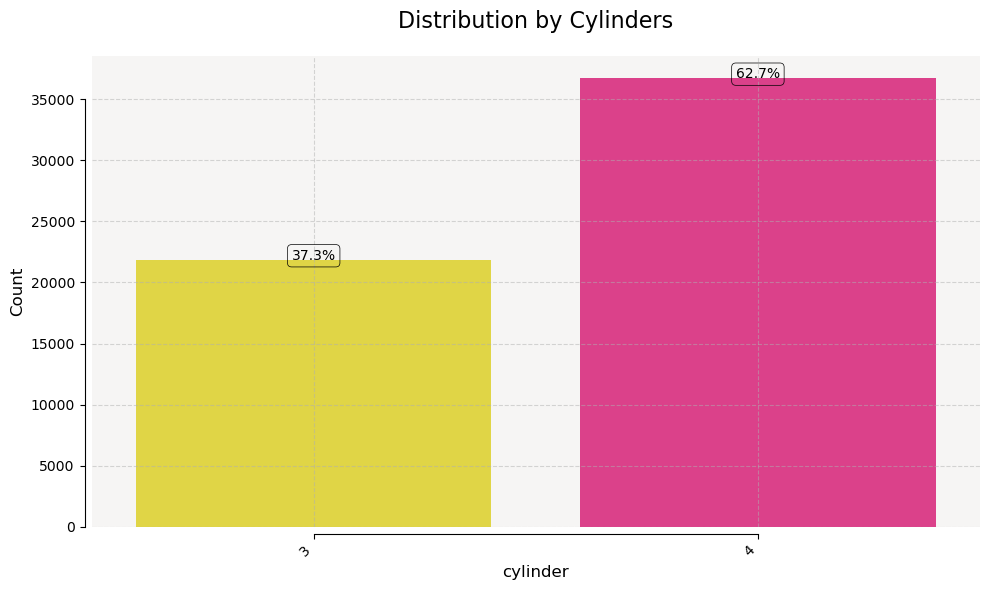

In [39]:
#Count plot for fuel_type
create_count_plot(df, x_col='cylinder', hue_col=None, title='Distribution by Cylinders')

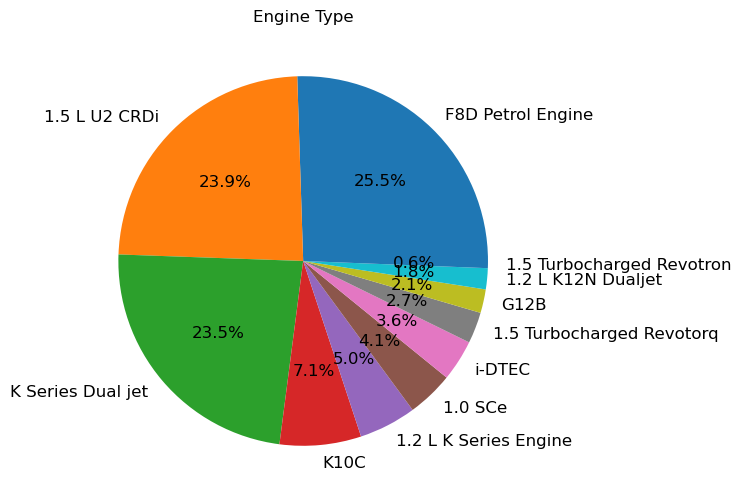

In [25]:
fig = plt.figure(figsize=(10, 6))

# Calculate the percentage of each engine type
engine_type_percentages = df['engine_type'].value_counts() * 100.0 / len(df)

# Plot the pie chart
ax = engine_type_percentages.plot.pie(autopct='%.1f%%', labels=engine_type_percentages.index,
                                      fontsize=12)

# Set title
ax.set_title('Engine Type')

# Hide y-axis label
ax.set_ylabel('')

plt.show()

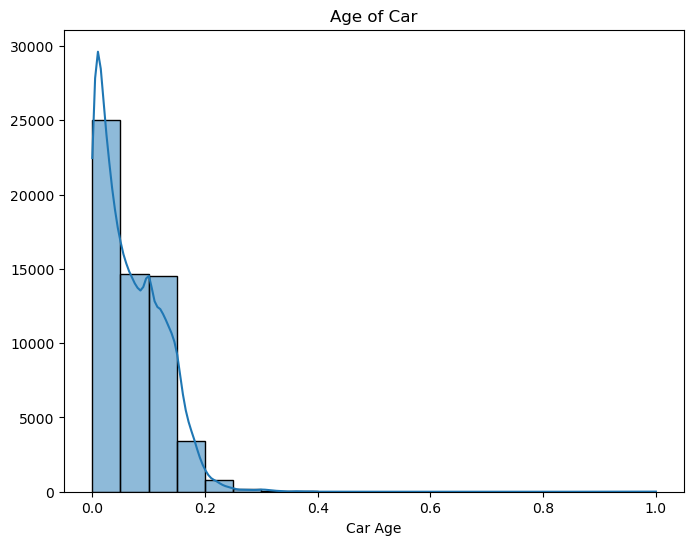

In [26]:
# Example: Histogram for a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(df['age_of_car'], bins=20, kde=True)
plt.title('Age of Car')
plt.xlabel('Car Age')
plt.ylabel('')
plt.show()

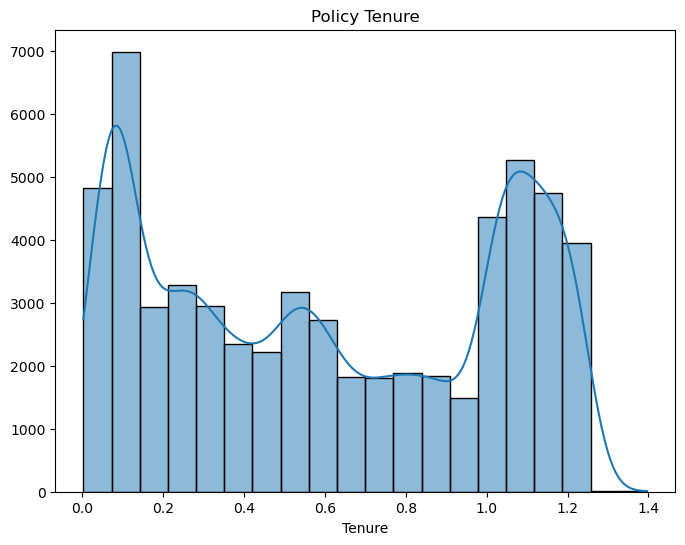

In [27]:
# Step 2: Visualization
# Example: Histogram for a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(df['policy_tenure'], bins=20, kde=True)
plt.title('Policy Tenure')
plt.xlabel('Tenure')
plt.ylabel('')
plt.show()

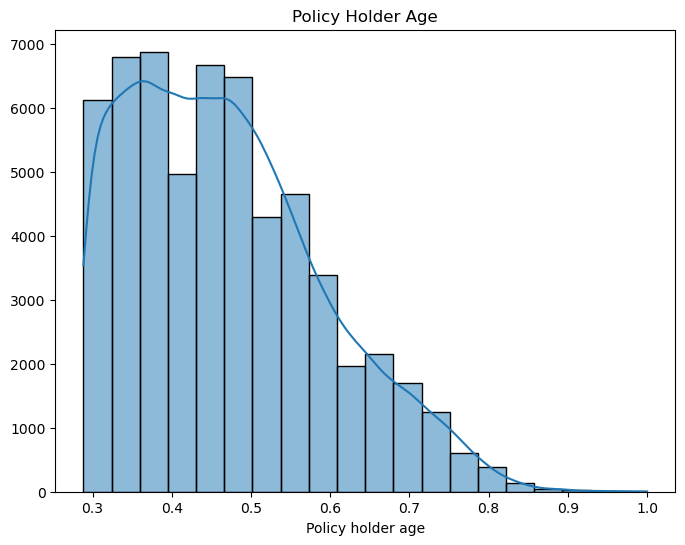

In [28]:
# Step 2: Visualization
# Example: Histogram for a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(df['age_of_policyholder'], bins=20, kde=True)
plt.title('Policy Holder Age')
plt.xlabel('Policy holder age')
plt.ylabel('')
plt.show()

__Bivariate and Multivariate__

In [21]:
# Assuming 'data' is your DataFrame containing the binary columns and target column
binary_plus_columns = ['airbags','ncap_rating', 'area_cluster', 'is_esc', 'is_adjustable_steering'
                 , 'is_tpms', 'is_parking_sensors','is_parking_camera', 'rear_brakes_type',
                 'cylinder','transmission_type', 'gear_box', 'steering_type','is_rear_window_wiper',
                 'is_rear_window_washer','is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
                 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 
                  'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'fuel_type']  # List of binary columns
target_column = 'is_claim'  # Name of the target column


for column in binary_plus_columns:
    pivot_table = df.pivot_table(index=column, columns=target_column, aggfunc='size', fill_value=0)
    pivot_table['Total'] = pivot_table.sum(axis=1)
    pivot_table['% Yes'] = pivot_table[1] / pivot_table['Total']
    pivot_table['% No'] = pivot_table[0] / pivot_table['Total']
#     print(f"\nPivot table for {column} vs {target_column}:\n")
#     print(pivot_table)
    # Beautify the pivot table
    pivot_table_styled = pivot_table.style.background_gradient(cmap='Blues', subset=['% Yes', '% No']) \
                                      .set_caption(f'Pivot table for {column} vs {target_column}') \
                                      .format({'% Yes': '{:.2%}', '% No': '{:.2%}'})
    display(pivot_table_styled)

is_claim,0,1,Total,% Yes,% No
airbags,,,,,
1,1136,73,1209,6.04%,93.96%
2,37852,2573,40425,6.36%,93.64%
6,15856,1102,16958,6.50%,93.50%


is_claim,0,1,Total,% Yes,% No
ncap_rating,,,,,
0,17905,1192,19097,6.24%,93.76%
2,20011,1391,21402,6.50%,93.50%
3,13117,901,14018,6.43%,93.57%
4,1981,133,2114,6.29%,93.71%
5,1830,131,1961,6.68%,93.32%


is_claim,0,1,Total,% Yes,% No
area_cluster,,,,,
C1,1392,76,1468,5.18%,94.82%
C10,3007,148,3155,4.69%,95.31%
C11,1140,72,1212,5.94%,94.06%
C12,1502,87,1589,5.48%,94.52%
C13,3228,195,3423,5.70%,94.30%
C14,3379,281,3660,7.68%,92.32%
C15,733,38,771,4.93%,95.07%
C16,378,23,401,5.74%,94.26%
C17,473,19,492,3.86%,96.14%


is_claim,0,1,Total,% Yes,% No
is_esc,,,,,
No,37640,2551,40191,6.35%,93.65%
Yes,17204,1197,18401,6.51%,93.49%


is_claim,0,1,Total,% Yes,% No
is_adjustable_steering,,,,,
No,21688,1378,23066,5.97%,94.03%
Yes,33156,2370,35526,6.67%,93.33%


is_claim,0,1,Total,% Yes,% No
is_tpms,,,,,
No,41727,2847,44574,6.39%,93.61%
Yes,13117,901,14018,6.43%,93.57%


is_claim,0,1,Total,% Yes,% No
is_parking_sensors,,,,,
No,2245,128,2373,5.39%,94.61%
Yes,52599,3620,56219,6.44%,93.56%


is_claim,0,1,Total,% Yes,% No
is_parking_camera,,,,,
No,33414,2290,35704,6.41%,93.59%
Yes,21430,1458,22888,6.37%,93.63%


is_claim,0,1,Total,% Yes,% No
rear_brakes_type,,,,,
Disc,13117,901,14018,6.43%,93.57%
Drum,41727,2847,44574,6.39%,93.61%


is_claim,0,1,Total,% Yes,% No
cylinder,,,,,
3,20552,1305,21857,5.97%,94.03%
4,34292,2443,36735,6.65%,93.35%


is_claim,0,1,Total,% Yes,% No
transmission_type,,,,,
Automatic,19101,1310,20411,6.42%,93.58%
Manual,35743,2438,38181,6.39%,93.61%


is_claim,0,1,Total,% Yes,% No
gear_box,,,,,
5,41379,2832,44211,6.41%,93.59%
6,13465,916,14381,6.37%,93.63%


is_claim,0,1,Total,% Yes,% No
steering_type,,,,,
Electric,22284,1597,23881,6.69%,93.31%
Manual,1136,73,1209,6.04%,93.96%
Power,31424,2078,33502,6.20%,93.80%


is_claim,0,1,Total,% Yes,% No
is_rear_window_wiper,,,,,
No,38988,2646,41634,6.36%,93.64%
Yes,15856,1102,16958,6.50%,93.50%


is_claim,0,1,Total,% Yes,% No
is_rear_window_washer,,,,,
No,38988,2646,41634,6.36%,93.64%
Yes,15856,1102,16958,6.50%,93.50%


is_claim,0,1,Total,% Yes,% No
is_rear_window_defogger,,,,,
No,35659,2418,38077,6.35%,93.65%
Yes,19185,1330,20515,6.48%,93.52%


is_claim,0,1,Total,% Yes,% No
is_brake_assist,,,,,
No,24803,1612,26415,6.10%,93.90%
Yes,30041,2136,32177,6.64%,93.36%


is_claim,0,1,Total,% Yes,% No
is_power_door_locks,,,,,
No,15166,991,16157,6.13%,93.87%
Yes,39678,2757,42435,6.50%,93.50%


is_claim,0,1,Total,% Yes,% No
is_central_locking,,,,,
No,15166,991,16157,6.13%,93.87%
Yes,39678,2757,42435,6.50%,93.50%


is_claim,0,1,Total,% Yes,% No
is_power_steering,,,,,
No,1136,73,1209,6.04%,93.96%
Yes,53708,3675,57383,6.40%,93.60%


is_claim,0,1,Total,% Yes,% No
is_driver_seat_height_adjustable,,,,,
No,22822,1479,24301,6.09%,93.91%
Yes,32022,2269,34291,6.62%,93.38%


is_claim,0,1,Total,% Yes,% No
is_day_night_rear_view_mirror,,,,,
No,34042,2267,36309,6.24%,93.76%
Yes,20802,1481,22283,6.65%,93.35%


is_claim,0,1,Total,% Yes,% No
is_ecw,,,,,
No,15166,991,16157,6.13%,93.87%
Yes,39678,2757,42435,6.50%,93.50%


is_claim,0,1,Total,% Yes,% No
is_speed_alert,,,,,
No,348,15,363,4.13%,95.87%
Yes,54496,3733,58229,6.41%,93.59%


is_claim,0,1,Total,% Yes,% No
fuel_type,,,,,
CNG,19095,1235,20330,6.07%,93.93%
Diesel,16580,1150,17730,6.49%,93.51%
Petrol,19169,1363,20532,6.64%,93.36%


__The owners of cars with highest NCAP rating are claiming slightly higher than rest__
- is_speed_alert: claiming higher more than 2 %

- Policy count is skewed towards younger buyers

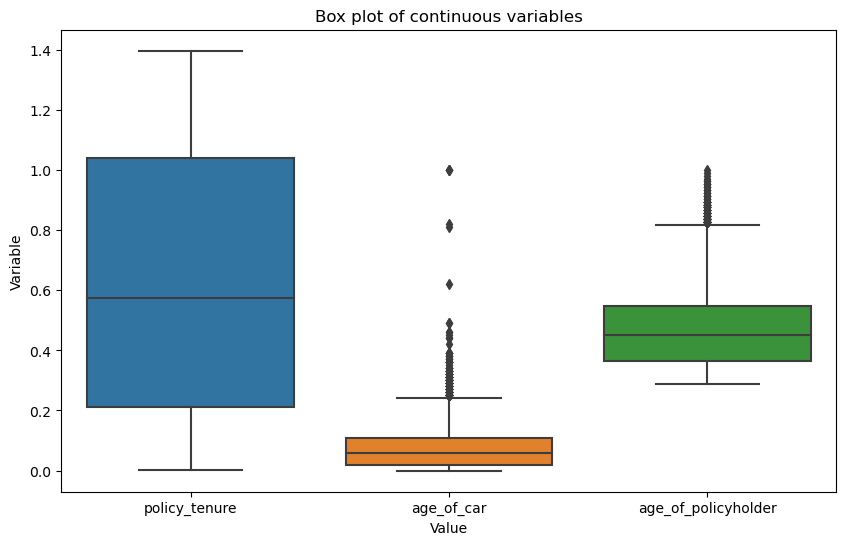

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['policy_tenure','age_of_car', 'age_of_policyholder',
                   'area_cluster']])
plt.title('Box plot of continuous variables')
plt.xlabel('Value')
plt.ylabel('Value')
plt.ylabel('Variable')
plt.show()

__Outliers in age_of_car variable__
- If the box plot shows a lot of outliers, binning the continuous variable can help mitigate the influence of extreme values and make the variable more robust to outliers
- If the outliers are removed some rows from policy tenure which are more evenly distributed would be deleted which would be loss of information

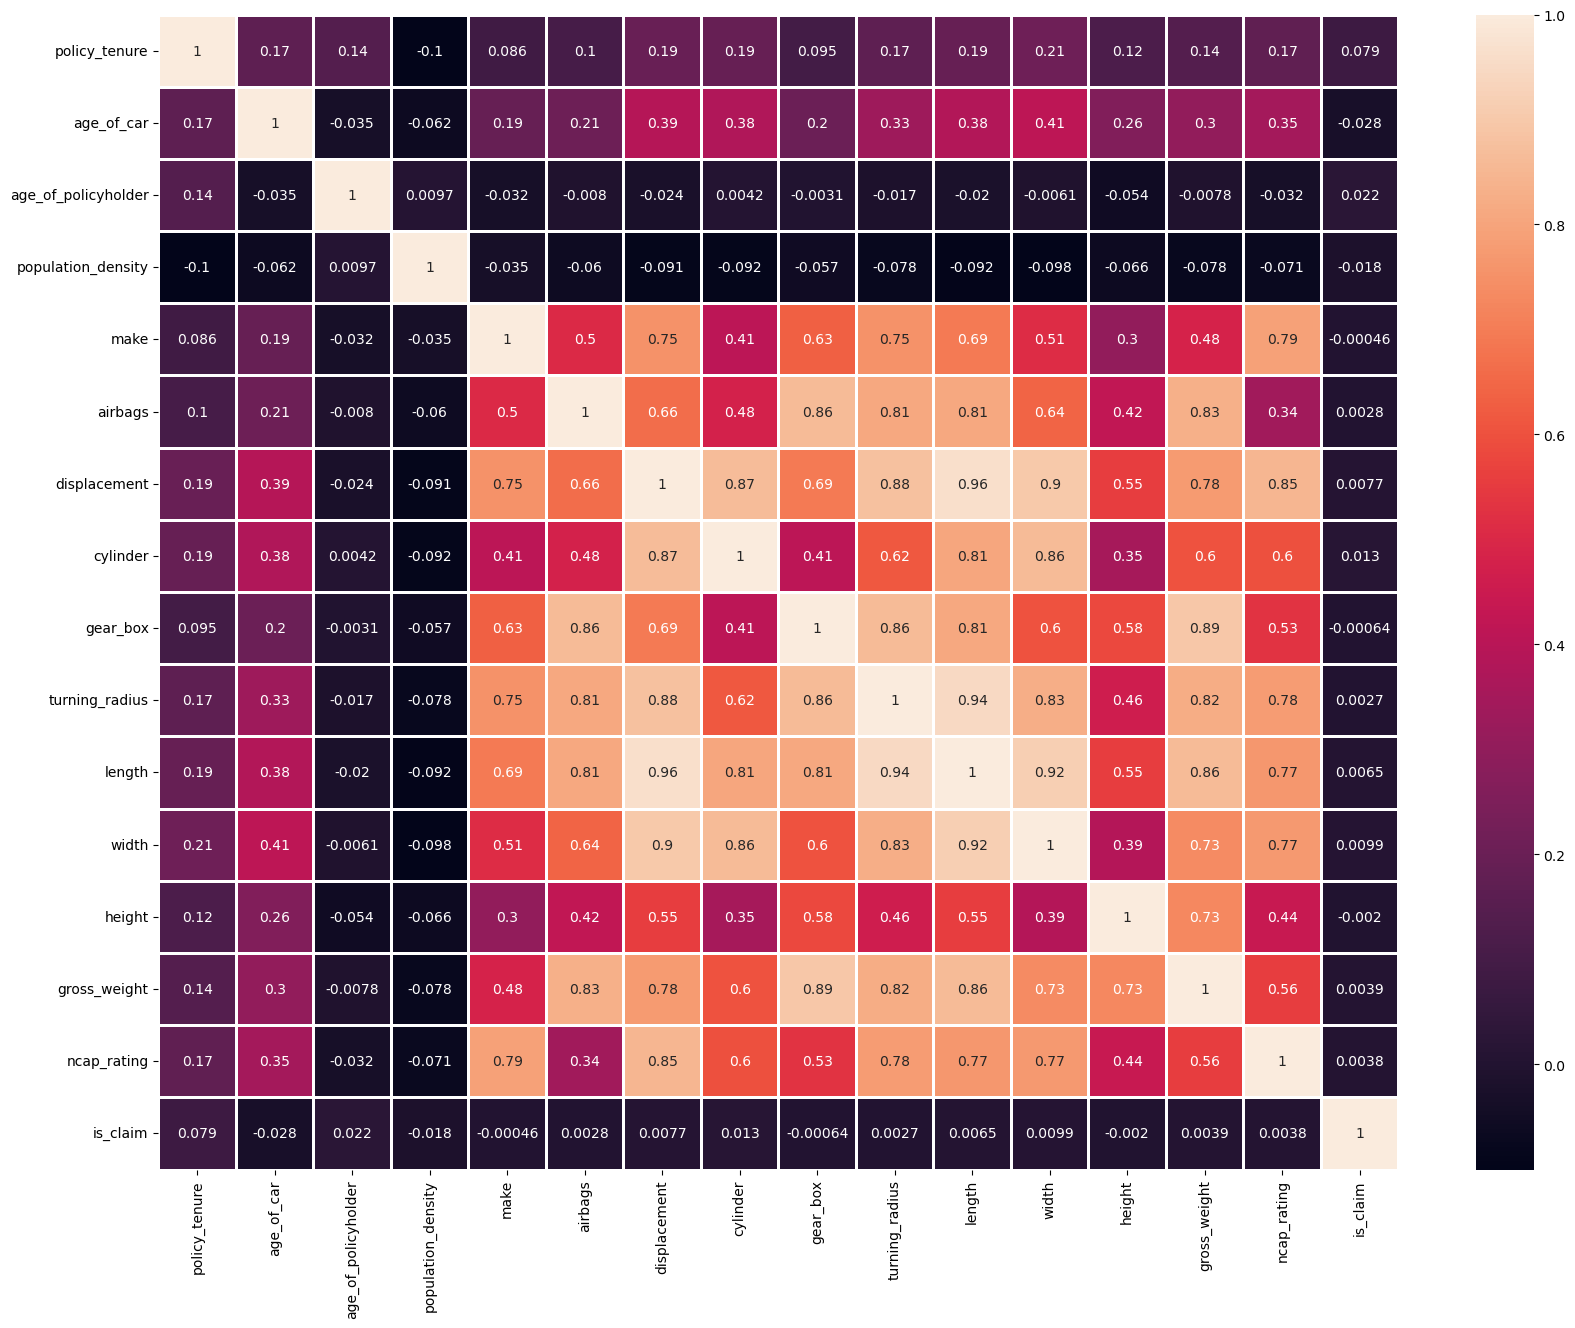

In [29]:
plt.figure(figsize = (20, 15))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

__Converting max_torque and max power to specific torque and power__

In [30]:
df['max_power'].value_counts()

88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64

In [31]:
df['max_torque'].value_counts()

113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64

In [30]:
# Extract numeric values and convert to DataFrame
# Additionally, specific torque combined with parameters related to vehicle handling and safety features, such as braking systems, stability control, and crash test ratings,
# can further enhance the understanding of a car's safety profile.
# Extract numeric values and convert to DataFrame

# Extract numeric values and convert to DataFrame
specific_torque = df['max_torque'].str.extract(r'([\d.]+)Nm@(\d+)rpm').astype(float)
specific_power = df['max_power'].str.extract(r'([\d.]+)bhp@(\d+)rpm').astype(float)

t_rpm = specific_torque[1]
p_rpm = specific_power[1]
# Divide torque values by rpm and power values by rpm
specific_torque = specific_torque[0] / t_rpm
specific_power = specific_power[0] / p_rpm

# Create a new DataFrame with the extracted values
result_df = pd.DataFrame({'specific_torque': specific_torque, 'specific_power': specific_power})

In [33]:
df['specific_torque'] = result_df['specific_torque']
df['specific_power'] = result_df['specific_power']

In [34]:
df.drop(['max_torque','max_power'],axis=1,inplace=True)

In [35]:
ss=StandardScaler()

In [36]:
df.loc[:,['policy_tenure',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight','specific_torque', 'specific_power']]=ss.fit_transform(pd.DataFrame(df.loc[:,['policy_tenure',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight','specific_torque', 'specific_power' ]]))

__Checking for skewed continuous Data__

In [37]:
df.age_of_car.skew()

1.0940812262542075

<Axes: xlabel='age_of_car', ylabel='Density'>

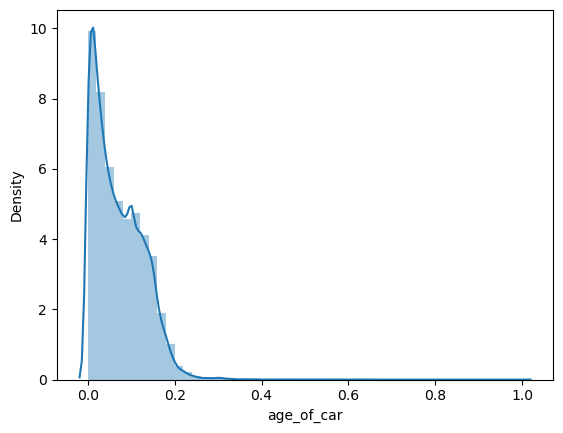

In [38]:
sns.distplot(df.age_of_car)

In [39]:
df.age_of_policyholder.skew()

0.6400493144176663

<Axes: xlabel='age_of_policyholder', ylabel='Density'>

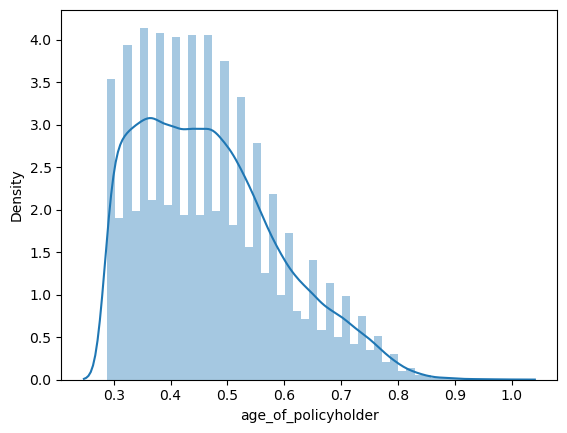

In [40]:
sns.distplot(df.age_of_policyholder)

__Transformation method to fix skewness__

In [41]:
pt=PowerTransformer(method='yeo-johnson')

In [42]:
df.loc[:,['age_of_car','age_of_policyholder']]=pt.fit_transform(pd.DataFrame(df.loc[:,['age_of_car','age_of_policyholder']]))

In [43]:
df.age_of_car.skew()

0.12448809341883195

<Axes: xlabel='age_of_car', ylabel='Density'>

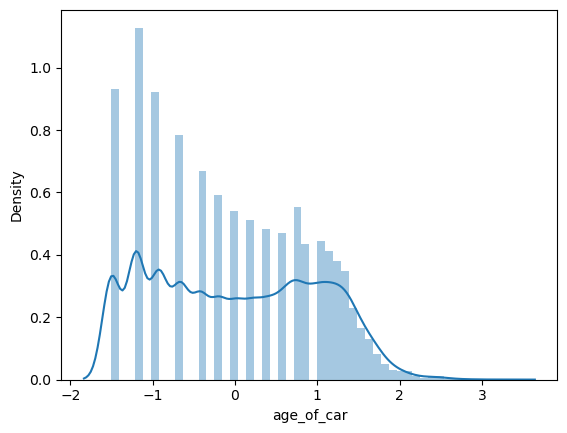

In [44]:
sns.distplot(df.age_of_car)

In [45]:
df.age_of_policyholder.skew()

0.06434841932146

<Axes: xlabel='age_of_policyholder', ylabel='Density'>

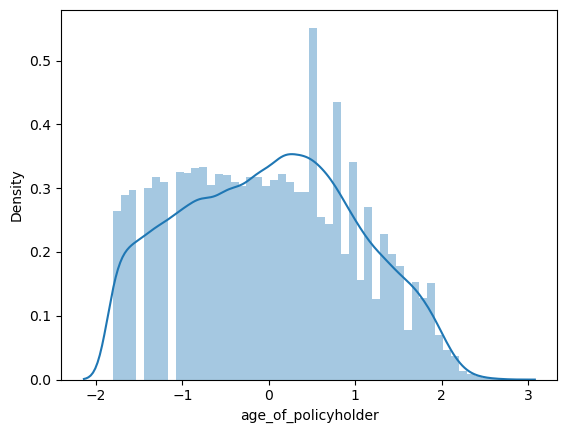

In [46]:
sns.distplot(df.age_of_policyholder)

In [47]:
cluster_freq=df['area_cluster'].value_counts(normalize=True).to_dict()
df['area_cluster']=df['area_cluster'].map(cluster_freq)

In [48]:
engine_freq=df['engine_type'].value_counts(normalize=True).to_dict()
df['engine_type']=df['engine_type'].map(engine_freq)

__Checking interdependencies in the data__

<Axes: >

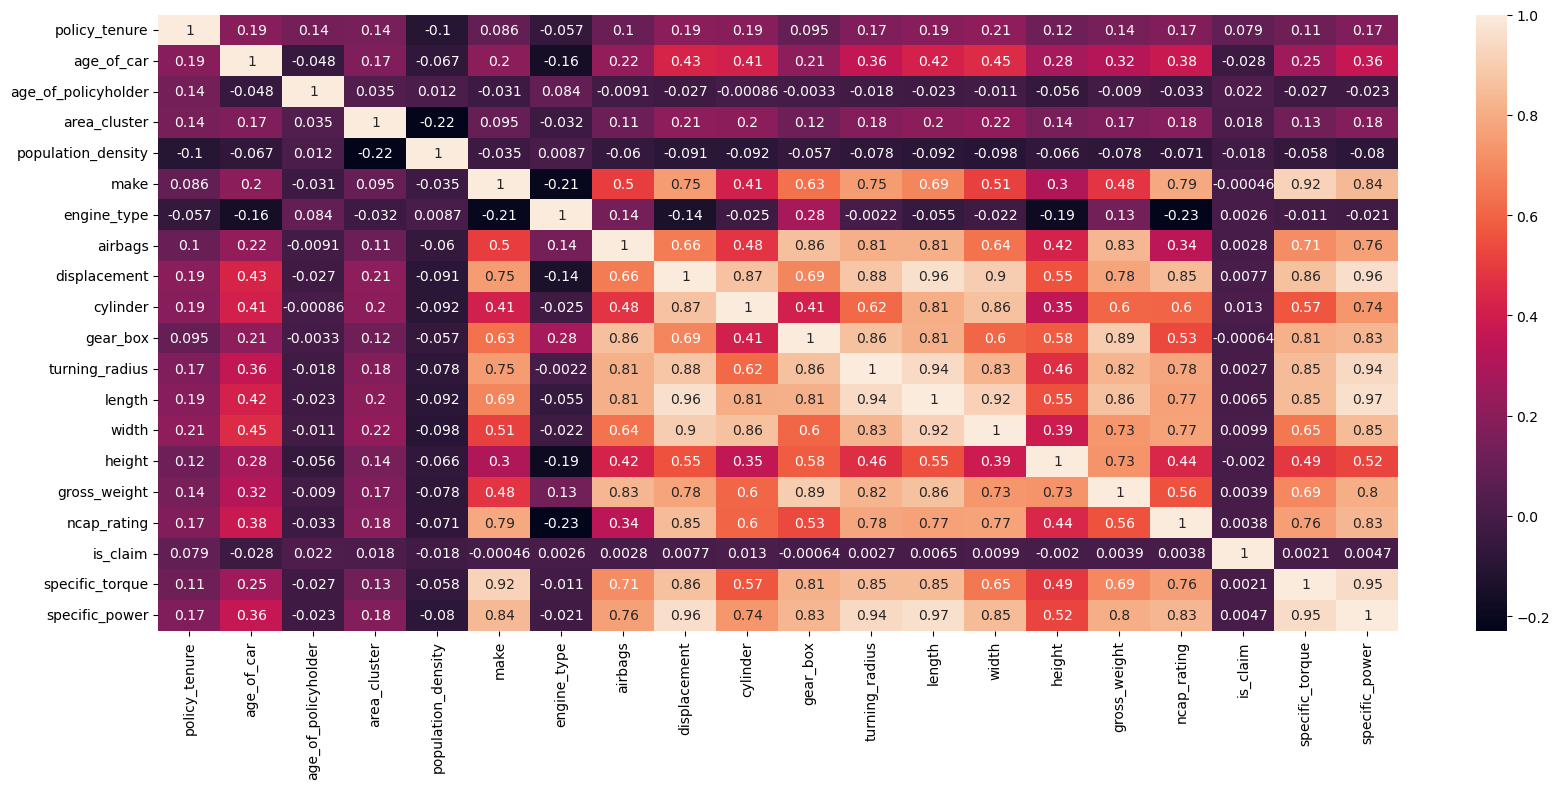

In [49]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

__Data Set Backup__

In [50]:
df_raw = df.copy

__Encoding the dataset__

In [51]:
# all_columns = df.columns

# # Initialize an empty list to store binary columns
# binary_columns = []

# # Iterate over each column to identify binary columns
# for column in all_columns:
#     # Check if the column contains only 0s and 1s
#     if set(df[column].unique()) == {'No', 'Yes'}:
#         binary_columns.append(column)

# print("Binary columns:", binary_columns)

In [41]:
# Some binary variables which can be converted to int data type for algorithm to work on

is_cols_train=[col for col in df.columns if col.startswith("is") and col!="is_claim"]
print(is_cols_train)

['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [53]:
# Converting all is_cols from object to int in training set
df = df.replace({ "No" : 0 , "Yes" : 1 })

In [54]:
# No of numerical columns in data set

num_col = df.select_dtypes(include=['int', 'float']).columns
print(" Data Set Numerical columns:")
print(num_col.nunique())
print(num_col)

 Data Set Numerical columns:
37
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'specific_torque', 'specific_power'],
      dtype='object')


In [55]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Data Set categorical columns:")
print(cat_cols.nunique())
print(cat_cols)

Data Set categorical columns:
6
Index(['segment', 'model', 'fuel_type', 'rear_brakes_type',
       'transmission_type', 'steering_type'],
      dtype='object')


__Change__

In [56]:
#Encoding train set
df= pd.get_dummies(df, columns=cat_cols,drop_first=True)

In [57]:
# Let's see major input features relating to target variable 'is_claim'
df.corr()['is_claim'].abs().sort_values(ascending=False)

is_claim                           1.000000
policy_tenure                      0.078747
age_of_car                         0.027629
age_of_policyholder                0.022176
population_density                 0.017808
area_cluster                       0.017553
is_adjustable_steering             0.013917
cylinder                           0.013434
segment_B2                         0.012714
is_front_fog_lights                0.011825
is_brake_assist                    0.010893
is_driver_seat_height_adjustable   0.010686
width                              0.009947
model_M6                           0.009503
steering_type_Power                0.009169
model_M3                           0.008419
is_parking_sensors                 0.008419
is_day_night_rear_view_mirror      0.007989
displacement                       0.007678
is_speed_alert                     0.007307
model_M11                          0.007307
fuel_type_Petrol                   0.007253
is_ecw                          

__Insights__
- TOP 3 factors affecting claim is

1.Policy Tenure 2.Age of Car 3.Age of policy holder

In [58]:
# Splitting the dataset
X = df.drop(columns = "is_claim", axis=1)
y = df["is_claim"]

In [59]:
X.shape

(58592, 57)

In [60]:
y.shape

(58592,)

In [61]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,sampling_strategy=0.30,random_state=12)

In [63]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Define the resampling methods
ros = RandomOverSampler()
rus = RandomUnderSampler()
smote = SMOTE()

# Define a hybrid approach combining ROS and SMOTE
hybrid = make_pipeline(RandomOverSampler(), SMOTE())
from imblearn.over_sampling import SMOTE

smt =  SMOTE(random_state=12,sampling_strategy=0.30)

x_sm, y_sm =  smt.fit_resample(X,y)

x_sm.shape, y_sm.shape

# Apply resampling methods to the dataset
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
X_resampled_hybrid, y_resampled_hybrid = hybrid.fit_resample(X_train, y_train)

((71297, 57), (71297,))

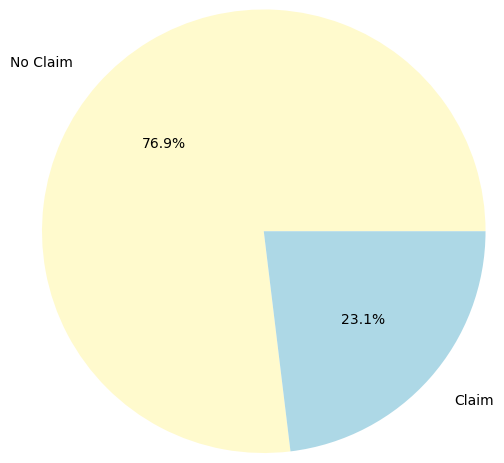

In [64]:
plt.pie(y_sm.value_counts(),labels=['No Claim','Claim'],radius=1.5,colors = ['#FFFACD','#ADD8E6'],
        autopct='%1.1f%%',labeldistance=1.15,startangle =0)

plt.show()

__Feature Selection__

__Mutual Info__

In [65]:
mutual_info=mutual_info_classif(x_sm,y_sm)
mutual_info

array([1.95293005e-02, 2.11107108e-01, 2.80242540e-01, 1.79873414e-01,
       1.80155346e-01, 6.53389464e-03, 1.88833125e-03, 4.88015872e-03,
       4.04947508e-03, 1.14776691e-02, 0.00000000e+00, 9.15079735e-03,
       4.50608963e-03, 2.97665024e-03, 1.15788398e-02, 2.53659282e-03,
       2.64988380e-03, 4.14567826e-03, 3.09970279e-04, 1.00459428e-03,
       8.80638656e-04, 8.14814899e-03, 2.99402856e-03, 1.55932825e-03,
       2.61498099e-03, 7.93168909e-03, 8.40238834e-03, 8.07136033e-03,
       8.63222630e-03, 8.82431459e-03, 3.05221602e-03, 8.82494304e-03,
       8.76168644e-03, 2.91789998e-03, 1.31136153e-03, 6.52486473e-04,
       0.00000000e+00, 3.55657823e-03, 2.64093511e-04, 3.20485695e-03,
       0.00000000e+00, 0.00000000e+00, 4.08954345e-03, 0.00000000e+00,
       2.65903708e-04, 0.00000000e+00, 0.00000000e+00, 2.56435491e-03,
       8.19624676e-04, 8.38427893e-05, 1.56660446e-03, 2.92985073e-03,
       1.39163269e-03, 9.60869202e-03, 5.38877581e-03, 0.00000000e+00,
      

In [67]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_sm.columns
pd.DataFrame(mutual_info.sort_values(ascending=False),columns=['Mutual_info']).head(20)

,Mutual_info
age_of_policyholder,0.280243
age_of_car,0.211107
population_density,0.180155
area_cluster,0.179873
policy_tenure,0.019529
cylinder,0.011579
is_adjustable_steering,0.011478
rear_brakes_type_Drum,0.009609
is_parking_sensors,0.009151
is_ecw,0.008825


In [68]:
# higher the mutual info more impactful the feature is

In [69]:
#### or we can use mutual info using select k best we will choose best 15 features

In [70]:
sel_feature=SelectKBest(score_func=mutual_info_classif,  k=20).fit(x_sm,y_sm)

In [71]:
sel_bool=sel_feature.get_support()
sel_bool

array([ True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True])

In [73]:
x_selected=x_sm[x_sm.columns[sel_bool]]
x_selected.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_adjustable_steering,is_parking_sensors,cylinder,gear_box,is_front_fog_lights,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_ecw,is_speed_alert,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Power
0,-0.230283,-0.200500,1.354890,0.025055,-0.783513,0,1,3,5,0,0,0,0,1,0,0,1,1,1,1
1,0.148188,-0.923772,-0.748659,0.125307,0.462975,0,1,3,5,0,0,0,0,1,0,0,1,1,1,1
2,0.555022,-0.923772,-0.646150,0.104127,-0.835268,0,1,3,5,0,0,0,0,1,0,0,1,1,1,1
3,0.697883,0.862825,-0.171140,0.011350,0.158275,1,1,4,5,1,1,1,1,1,1,1,1,1,0,0
4,-0.035840,0.862825,1.300866,0.119112,0.900969,0,0,3,5,0,0,1,1,1,0,1,1,1,0,0


__Feature selection Mutual Info 1: Selected Columns__
- Testing Both categorical and Numerical

In [74]:
x_selected.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'is_adjustable_steering', 'is_parking_sensors',
       'cylinder', 'gear_box', 'is_front_fog_lights', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_ecw', 'is_speed_alert',
       'rear_brakes_type_Drum', 'transmission_type_Manual',
       'steering_type_Power'],
      dtype='object')

__Step 2 T Test selected columns__
- Testing Continuous /Numerical

In [80]:
numc=['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight','specific_torque', 'specific_power']
for col in numc:
    x1=df.loc[(df.is_claim==0),col]
    x2=df.loc[(df.is_claim==1),col]
    _,pval=scipy.stats.ttest_ind(x1,x2)
    print(col,pval)

policy_tenure 3.018115612766907e-81
age_of_car 2.246308039868693e-11
age_of_policyholder 7.947294292165445e-08
population_density 1.6259324287866506e-05
displacement 0.06310215766251905
turning_radius 0.5096346505221433
length 0.11594199374360997
width 0.016050284839034968
height 0.6242737534929995
gross_weight 0.34585778706366954
specific_torque 0.6179234568676205
specific_power 0.25129468091120766


__T Test__
- __PVALUE LESS THAN 0.05 for below given variables__
-  policy_tenure: 3.0181155800813767e-81
- age_of_car :2.246308039868693e-11
- age_of_policyholder: 7.947294140806103e-08
- population_density: 1.6259324287866628e-05
- width: 0.016050284839034968

In [82]:
x_sm.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'specific_torque',
       'specific_power', 'segment_B1', 'segment_B2', 'segment_C1',
       'segment_C2', 'segment_Utility', 'model_M10', 'model_M11', 'model_M2',
       'model_M3', 'model_M4', 'model_M5', 'model_M6', 'model_M7', 'model_M8',
       'model_M9', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'rear_

__Chi Square__
- For categorical data

In [89]:
test_cols=x_sm.loc[:,['area_cluster', 'make', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'cylinder', 'gear_box',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'segment_B1', 'segment_B2', 'segment_C1',
       'segment_C2', 'segment_Utility', 'model_M10', 'model_M11', 'model_M2',
       'model_M3', 'model_M4', 'model_M5', 'model_M6', 'model_M7', 'model_M8',
       'model_M9', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'rear_brakes_type_Drum', 'transmission_type_Manual',
       'steering_type_Manual', 'steering_type_Power']]

In [90]:
test_cols.head(1)

,area_cluster,make,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,cylinder,gear_box,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
0,0.025055,1,0.255120,2,0,0,0,1,0,3,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


In [92]:
f_p_values=chi2(test_cols,y_sm)
f_p_values

(array([5.55336972e+00, 1.62210355e-01, 2.30691361e-04, 3.40980924e-02,
        2.48413171e-01, 1.62139060e+01, 2.13968499e-01, 4.53244891e-01,
        6.85302574e-02, 2.46458844e+00, 4.42465635e-02, 1.18830753e+01,
        6.33086224e-03, 6.33086224e-03, 7.01830170e-01, 8.44462095e+00,
        3.07913918e+00, 3.07913918e+00, 2.48012174e-02, 9.59035138e+00,
        1.25892881e+01, 3.07913918e+00, 6.57751417e-02, 6.70631603e+00,
        7.73089662e+00, 2.24297925e+01, 3.33587722e+00, 2.13968499e-01,
        1.19132836e+00, 1.19132836e+00, 1.12343942e+01, 1.25961812e+01,
        1.09978540e+01, 2.13968499e-01, 9.46727295e+00, 1.48552082e+01,
        1.43082775e+00, 7.73089662e+00, 1.28546258e+00, 8.45357679e-01,
        8.43415204e+00, 6.70903476e-02, 2.38325367e-02, 1.19132836e+00,
        1.15243712e+01]),
 array([1.84451436e-02, 6.87129596e-01, 9.87881775e-01, 8.53498320e-01,
        6.18194636e-01, 5.65772780e-05, 6.43674558e-01, 5.00798022e-01,
        7.93488866e-01, 1.16438198e-01

__Step 3 Chi Square Test Slected Columns__

In [93]:
p_chi=pd.Series(f_p_values[1])
p_chi.index=test_cols.columns
p_chi.sort_values(ascending=True)[p_chi.sort_values(ascending=True)<0.05].index

Index(['segment_B2', 'is_adjustable_steering', 'model_M6', 'model_M2',
       'is_day_night_rear_view_mirror', 'is_front_fog_lights',
       'steering_type_Power', 'model_M11', 'model_M3',
       'is_driver_seat_height_adjustable', 'model_M5', 'is_brake_assist',
       'fuel_type_Petrol', 'model_M8', 'segment_B1', 'ncap_rating',
       'area_cluster'],
      dtype='object')

<Axes: >

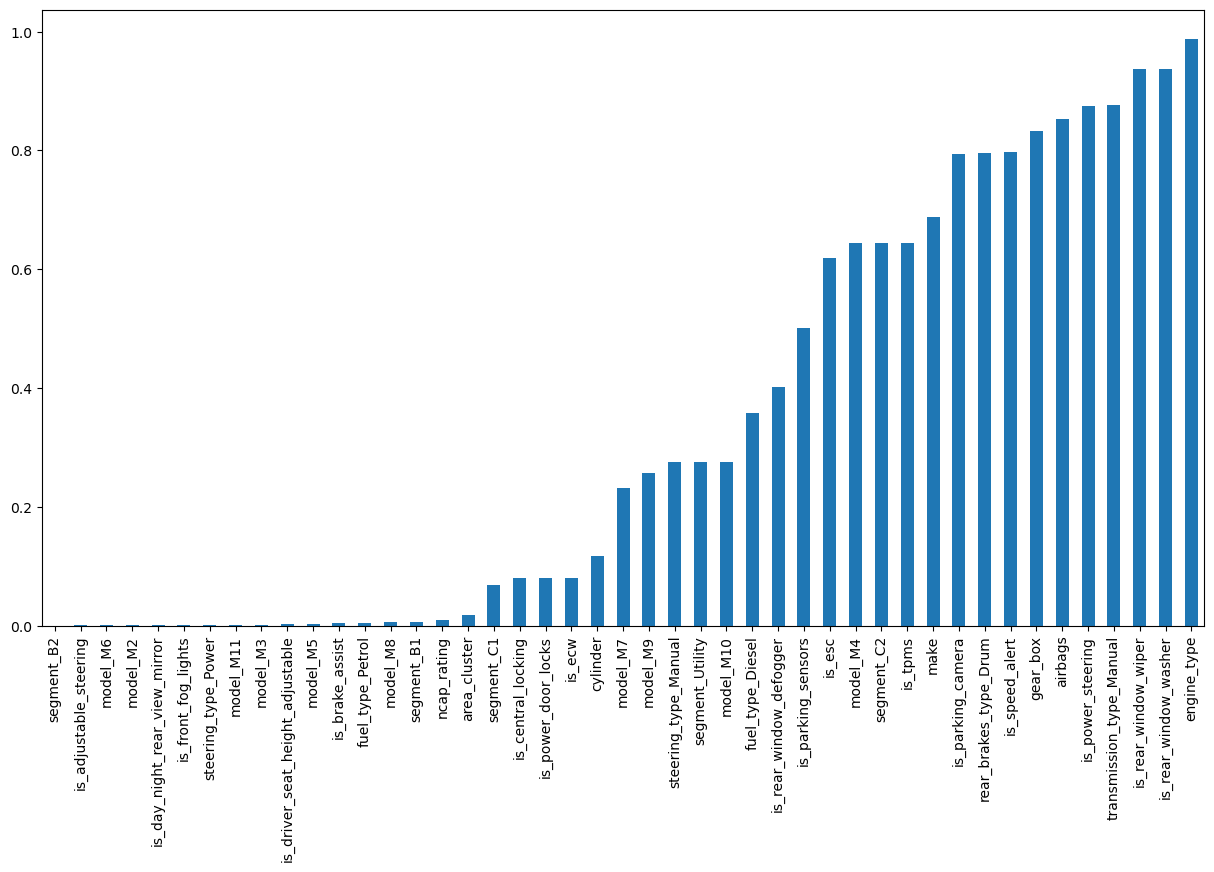

In [94]:
plt.figure(figsize=(15,8))
p_chi.sort_values(ascending=True).plot(kind='bar')

- TOP 3 factors affecting claim are

1.Policy Tenure 2.Age of Car 3.Age of policy holder

# Selected Columns on the basis of Mutual info and statistical tests
- Top features from Ttest, Chi Square, Mutual Info and correlation

# Final selected features

In [109]:
x_stat=x_sm.loc[:,['segment_B2', 'is_adjustable_steering',
       'is_day_night_rear_view_mirror', 'is_front_fog_lights',
       'steering_type_Power',
       'is_driver_seat_height_adjustable', 'is_brake_assist',
       'fuel_type_Petrol',  'cylinder', 'ncap_rating',
       'area_cluster','is_central_locking','policy_tenure',
        'age_of_car','age_of_policyholder','population_density','width']]

In [110]:
x_stat.shape

(71297, 17)

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x_stat,y_sm,test_size=0.2,random_state=2)

In [113]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(57037, 17)
(14260, 17)
(57037,)
(14260,)


In [114]:
# fit all the models at once

clfs = {
    'Logreg' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Ada Boost' : AdaBoostClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'XgBoost' : XGBClassifier(),
}

models_report = pd.DataFrame(columns=['model name', 'accuracy', 'recall', 'precision', 'roc auc', 'f1 score'])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    print('Fitting model...', clf_name)
    t = {'model name' : clf_name,
        'accuracy' : accuracy_score(ytest,y_pred),
        'recall' : recall_score(ytest,y_pred),
        'precision' : precision_score(ytest,y_pred),
        'roc auc' : roc_auc_score(ytest,y_pred),
        'f1 score' : f1_score(ytest,y_pred),
        }
    models_report = models_report.append(t, ignore_index=True)

models_report = models_report.sort_values(by='f1 score', ascending=False)
models_report

Fitting model... Logreg
Fitting model... KNN
Fitting model... Naive Bayes
Fitting model... Decision Tree
Fitting model... Random Forest
Fitting model... Ada Boost
Fitting model... Gradient Boost
Fitting model... XgBoost


,model name,accuracy,recall,precision,roc auc,f1 score
7,XgBoost,0.937447,0.725435,0.996157,0.862310,0.839511
4,Random Forest,0.916199,0.688744,0.919469,0.835589,0.787556
3,Decision Tree,0.859327,0.714552,0.678677,0.808019,0.696153
1,KNN,0.829032,0.717351,0.601408,0.789452,0.654282
6,Gradient Boost,0.861571,0.386194,1.000000,0.693097,0.557201
5,Ada Boost,0.823703,0.277674,0.823801,0.630190,0.415349
2,Naive Bayes,0.773001,0.008396,0.360000,0.502025,0.016408
0,Logreg,0.774474,0.000000,0.000000,0.500000,0.000000


# DecisionTreeClassifier

In [118]:
dt=DecisionTreeClassifier(random_state=20)

In [119]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

In [121]:
y_dt_pred = dt.predict(x_test)

__Testing Data__

In [122]:
class_report=classification_report(y_test,y_dt_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11044
           1       0.68      0.71      0.70      3216

    accuracy                           0.86     14260
   macro avg       0.80      0.81      0.80     14260
weighted avg       0.86      0.86      0.86     14260



In [123]:
f1_score(y_test,y_dt_pred)

0.6950462051204362

In [124]:
# Training Report
y_dt_train_pred = t.predict(x_train)
print(classification_report(y_train, y_dt_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43800
           1       1.00      1.00      1.00     13237

    accuracy                           1.00     57037
   macro avg       1.00      1.00      1.00     57037
weighted avg       1.00      1.00      1.00     57037



In [126]:
t_accuracy=accuracy_score(y_test,y_dt_pred)
t_accuracy

0.858835904628331

In [127]:
roc_auc_score(y_test,y_dt_pred)

0.807260893107804

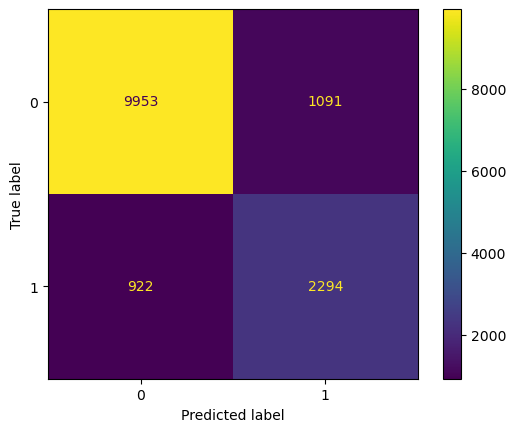

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_dt_pred)

__Parameter Tuning__

__Grid Search CV__

In [146]:
# If we tune the hyperparameters in the decision tree, it helps to avoid/reduce the over-fitting of the tree.

In [129]:
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7,10],
    'min_samples_split': [10,15,20],
    'min_samples_leaf': [1, 2, 3],
    'max_features' :['auto','log2',None]
}

In [131]:
cv=GridSearchCV(estimator=dt,param_grid=param_grid,cv=20,verbose=1,scoring='roc_auc')

In [132]:
dcv=cv.fit(x_train,y_train)

Fitting 20 folds for each of 270 candidates, totalling 5400 fits


In [133]:
dcv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 20}

In [138]:
dt1 = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 19,
 min_samples_leaf= 3,
 min_samples_split= 20,
random_state=20
                         )

In [139]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=3,
                       min_samples_split=20, random_state=20)

In [141]:
y_testpred_hyper=dt1.predict(xtest)
y_testpred_hyper 

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [142]:
# Testing report
class_report=classification_report(y_test,y_testpred_hyper)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     11044
           1       0.84      0.53      0.65      3216

    accuracy                           0.87     14260
   macro avg       0.86      0.75      0.79     14260
weighted avg       0.87      0.87      0.86     14260



In [143]:
# Training Report
y_trainpred_hyper = dt1.predict(x_train)
print(classification_report(ytrain, y_trainpred_hyper))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     43800
           1       0.93      0.59      0.72     13237

    accuracy                           0.89     57037
   macro avg       0.91      0.79      0.83     57037
weighted avg       0.90      0.89      0.89     57037



In [144]:
y_trainpred_accuracy = accuracy_score(y_test,y_testpred_hyper)
y_trainpred_accuracy

0.8719495091164096

In [147]:
roc_auc_score(y_test,y_testpred_hyper)

0.7521420987240546

### random search cv for decision tree
- Not tried

In [148]:
parameters={
     'criterion':['gini','entropy'],
     'max_depth':range(2,30),
     'min_samples_split': range(1,25)

}

In [150]:
drscv=RandomizedSearchCV(dt,param_distributions=parameters,cv=15,scoring='recall',n_iter=50,verbose=1)

In [153]:
drscvmod=drscv.fit(x_train,y_train)
drscvmod

Fitting 15 folds for each of 50 candidates, totalling 750 fits


RandomizedSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=20),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'min_samples_split': range(1, 25)},
                   scoring='recall', verbose=1)

In [154]:
drscvmod.best_params_

{'min_samples_split': 3, 'max_depth': 28, 'criterion': 'gini'}

In [155]:
drscv1=RandomForestClassifier(criterion= 'entropy',
                         max_depth=27,
                         min_samples_split=10,
                         random_state=20
                         )

In [156]:
drscv1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=27, min_samples_split=10,
                       random_state=20)

In [158]:
drscv_pred=drscv1.predict(x_test)
drscv_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [159]:
#Test Classification report
print(classification_report(y_test,drscv_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11044
           1       0.95      0.60      0.74      3216

    accuracy                           0.90     14260
   macro avg       0.92      0.80      0.84     14260
weighted avg       0.91      0.90      0.89     14260



In [161]:
drscv_train_pred = drscv1.predict(x_train)
print(classification_report(y_train, drscv_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     43800
           1       0.99      0.77      0.87     13237

    accuracy                           0.95     57037
   macro avg       0.96      0.88      0.92     57037
weighted avg       0.95      0.95      0.94     57037



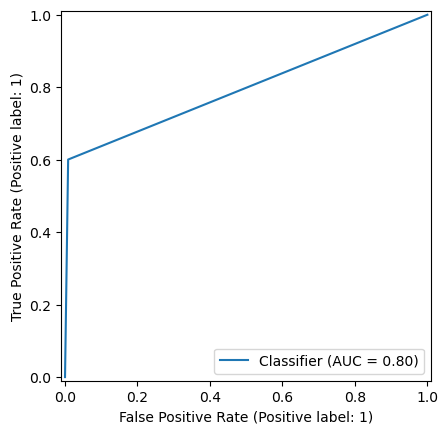

In [162]:
RocCurveDisplay.from_predictions(ytest,drscv_pred)

In [163]:
roc_auc_score(ytest,drscv_pred)

0.7959166837849867

In [164]:
f1_score(ytest,drscv_pred)

0.7367417016405952

__Random Forest Classifier__

In [165]:
rfc=RandomForestClassifier(random_state=20)

In [166]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(random_state=20)

In [167]:
rfc_pred=rfc.predict(xtest)

In [168]:
rfc_acc=accuracy_score(ytest,rfc_pred)
rfc_acc

0.9154978962131838

In [169]:
class_report_rfc=classification_report(ytest,rfc_pred)
print(class_report_rfc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11044
           1       0.91      0.69      0.79      3216

    accuracy                           0.92     14260
   macro avg       0.92      0.84      0.87     14260
weighted avg       0.92      0.92      0.91     14260



In [170]:
# Training Report
rfc_train_pred = rfc.predict(xtrain)
print(classification_report(ytrain, rfc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43800
           1       1.00      1.00      1.00     13237

    accuracy                           1.00     57037
   macro avg       1.00      1.00      1.00     57037
weighted avg       1.00      1.00      1.00     57037



In [171]:
roc_score_rfc=roc_auc_score(ytest,rfc_pred)
roc_score_rfc

0.8353565047814171

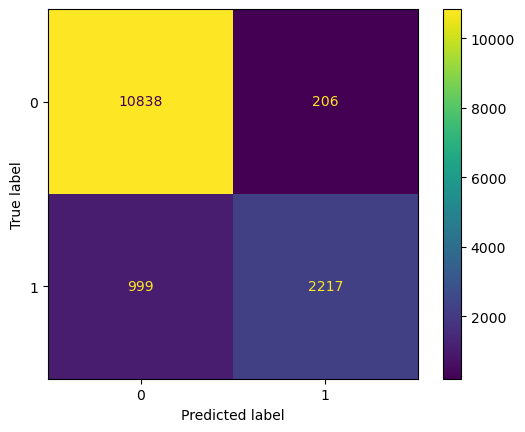

In [172]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,rfc_pred)

__XGB Classifier__

In [174]:
xg=XGBClassifier()

In [175]:
xg.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [185]:
xg_pred=xg.predict(xtest)

In [186]:
xg_acc=accuracy_score(ytest,xg_pred)
xg_acc

0.9374474053295933

In [187]:
# Test report
print(classification_report(ytest,xg_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11044
           1       1.00      0.73      0.84      3216

    accuracy                           0.94     14260
   macro avg       0.96      0.86      0.90     14260
weighted avg       0.94      0.94      0.93     14260



In [188]:
# Training Report
xg_train_pred = xg.predict(xtrain)
print(classification_report(ytrain, xg_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43800
           1       1.00      0.74      0.85     13237

    accuracy                           0.94     57037
   macro avg       0.96      0.87      0.91     57037
weighted avg       0.94      0.94      0.94     57037



In [189]:
roc_auc_score(ytest,xg_pred)

0.8623102006267107

In [190]:
kf=KFold(shuffle=True,random_state=2,n_splits=20)

In [191]:
xg_param={
    'n_estimators':range(1,100),
    'learning_rate':[0.0001, 0.001, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
    'gamma':range(0,10)
}

In [192]:
xgcv=RandomizedSearchCV(estimator=xg,cv=kf,param_distributions=xg_param,verbose=1,n_iter=50,scoring='roc_auc')

In [193]:
xgcv.fit(xtrain,ytrain)

Fitting 20 folds for each of 50 candidates, totalling 1000 fits


RandomizedSearchCV(cv=KFold(n_splits=20, random_state=2, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=No...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=50,
                   param_distributions={'gamma': range(0, 10),
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7],
                                        'n_estimators': range(1, 100)},
                   scoring='roc_auc', verbose=1)

In [194]:
xgcv.best_params_

{'n_estimators': 73, 'learning_rate': 0.4, 'gamma': 1}

In [195]:
xg11=XGBClassifier(n_estimators=93,learning_rate=0.3,gamma=0)

In [196]:
xg_=xg11.fit(xtrain,ytrain)

In [197]:
xg11_pred=xg_.predict(xtest)

In [198]:
print(classification_report(ytest,xg11_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11044
           1       1.00      0.72      0.84      3216

    accuracy                           0.94     14260
   macro avg       0.96      0.86      0.90     14260
weighted avg       0.94      0.94      0.93     14260



In [199]:
# Training Report
xg11_train_pred = xg_.predict(xtrain)
print(classification_report(ytrain, xg11_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43800
           1       1.00      0.74      0.85     13237

    accuracy                           0.94     57037
   macro avg       0.96      0.87      0.90     57037
weighted avg       0.94      0.94      0.94     57037



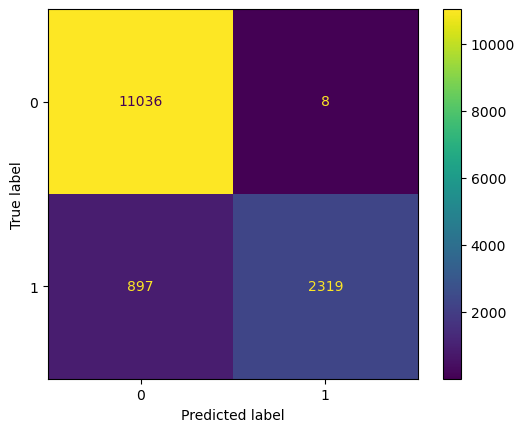

In [200]:
ConfusionMatrixDisplay.from_predictions(ytest,xg11_pred)

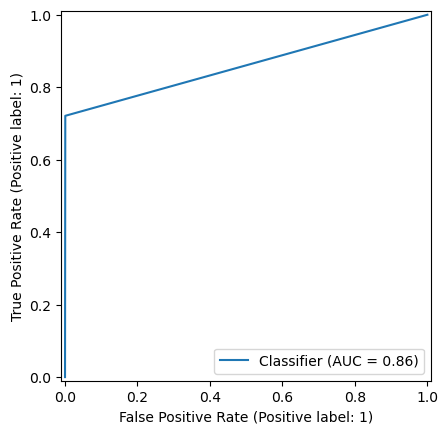

In [201]:
RocCurveDisplay.from_predictions(ytest,xg11_pred)